Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  

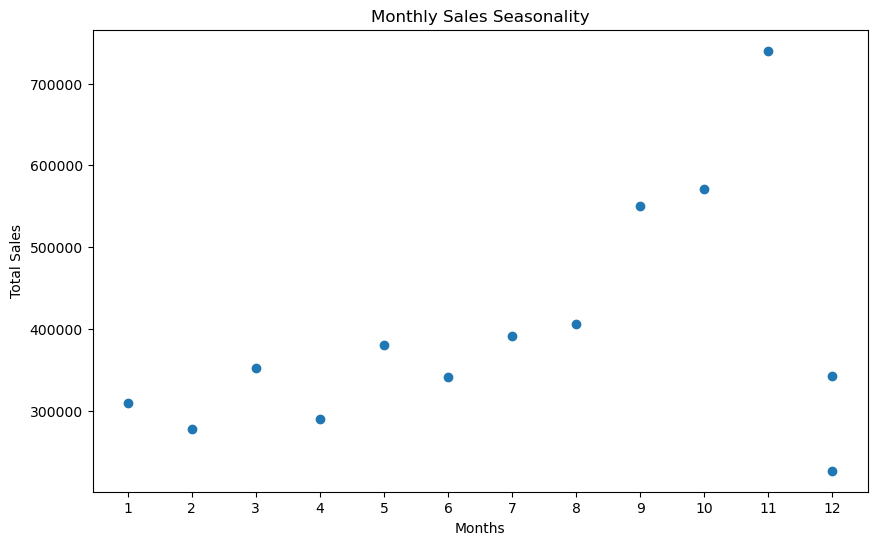

Top 25 CustomerIDs based on Turnover: CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
13089.0     57385.88
14096.0     57120.91
15061.0     54228.74
17949.0     52750.84
15769.0     51823.72
16029.0     50992.61
14298.0     50862.44
14088.0     50415.49
17841.0     40340.78
13798.0     36351.42
16422.0     33805.69
12931.0     33462.81
16013.0     33366.25
15838.0     33350.76
17389.0     31300.08
Name: Turnover, dtype: float64


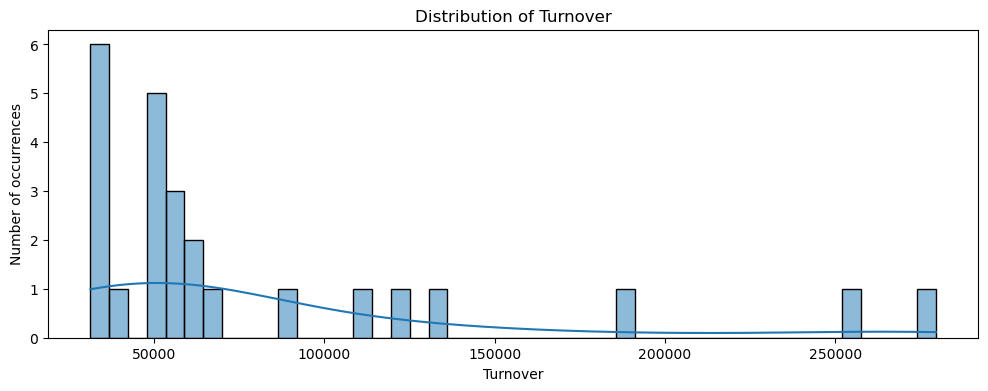

Text(0.5, 1.0, 'Purchase Frequency Distribution')

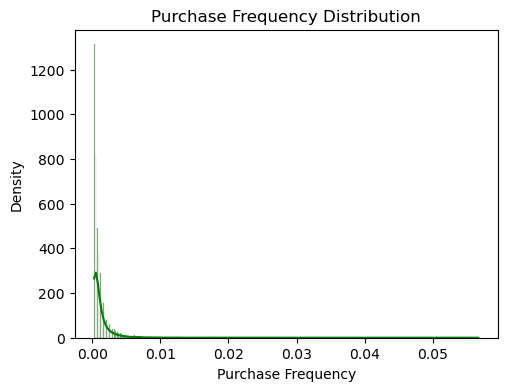

In [11]:
#Data preparation + EDA
#import lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Load the dataset into a DataFrame
df = pd.read_excel('Online Retail.xlsx')

#Data prep1: Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values) #there are 2 columns with the missing values: CustomerID 135080, and Description: 1454

#remove rows with missing values  
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])
print(df_cleaned.head())
print(df_cleaned.shape)

#Data prep2: Check for outliers
threshold = 0.95
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
outliers = df_cleaned[numeric_columns].quantile(threshold)
print("Outliers:", outliers)

#remove outliers
df_filtered = df_cleaned[(df_cleaned[numeric_columns] <= outliers).all(axis=1)]

#print the filtered DataFrame
print("Filtered Dataset:\n", df_filtered)

#Data prep3: add columns
#Extract the date from the Date of Invoice column (Conversion first, otherwise, the invoice date will be treated as strings / objects)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Day'] = df['InvoiceDate'].dt.date 
df['Month'] = df['InvoiceDate'].dt.month

#Turnover calculation column
df['Turnover'] = df['Quantity'] * df['UnitPrice']
print(df[['InvoiceDate', 'Month','Day']].head())
print(df[['Turnover']].head())

#Purchase Frequency column
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique() / df['CustomerID'].nunique()
df['Purchase Frequency'] = purchase_frequency

#__________________________
#Variances
# Select the columns to calculate the variance
columns_1 = ['Quantity', 'UnitPrice']
columns_2 = ['Quantity', 'CustomerID']

# Var calculation
variance_1 = df[columns_1].var()
variance_2 = df[columns_2].var()
print("Variance:", variance_1)
print("Variance:", variance_2)


#Correlations
#Corr_1: Quantity & Turnover
corr_1 = df['Quantity'].corr(df['Turnover'])

#Corr_2: Quantity & Date of Invoice
corr_2 = df['Quantity'].corr(df['InvoiceDate'].view('int64')) 

#Corr_3: PriceUnit & Turnover
corr_3 = df['UnitPrice'].corr(df['Turnover'])

#Corr_4: CustomerID, StockCode, and Description : Get rid of this one 
columns_4 = ['CustomerID', 'StockCode', 'Description']
selected_columns = df[columns_4]
correlation_matrix = selected_columns.corr()

print("Correlation between Quantity & Turnover", corr_1)
print("Correlation between Quantity & Date of Invoice", corr_2)
print("Correlation between Price per Unit & Turnover", corr_3)


##_________________________________
#The mean & Standard Deviation

#The mean
mean_quantity = df['Quantity'].mean()
mean_unitprice = df['UnitPrice'].mean()
print("The mean of Quantity:", mean_quantity)
print("The mean of Unit Price:", mean_unitprice)


#Standard Deviation
std_quantity = df['Quantity'].std()
std_unitprice = df['UnitPrice'].std()

print("Std of Quantity:", std_quantity)
print("Std of Unit Price:", std_unitprice) 


#The min & max values of InvoiceDate: 
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()
print("Min Invoice Date", min_date)
print("Max Invoice Date", max_date)




#__________________________________
#Identify the peak and the trough of sales (monthly sales):
#Extract the month & year (duplicated)
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

#Monthly sales calculation
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum()

#Reset index to have separate columns for Year & Month
monthly_sales = monthly_sales.reset_index()

#Scatter plot Monthly Sales
plt.figure(figsize=(10,6))
plt.scatter(monthly_sales['Month'], monthly_sales['Quantity'], marker='o')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Seasonality')
plt.xticks(range(1,13))
plt.show()


#Identify the most valuable customer based on the turnover (top25)
turnover_per_customer = df.groupby('CustomerID')['Turnover'].sum()
top_25_customers = turnover_per_customer.sort_values(ascending=False).head(25)
print("Top 25 CustomerIDs based on Turnover:", top_25_customers)



#Turnover distribution via Histogram
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(top_25_customers, bins=45, kde=True)
ax.set_xlabel("Turnover")
ax.set_ylabel("Number of occurrences")
ax.set_title("Distribution of Turnover")
plt.show()

#Purchase Frequency distribution 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
sns.histplot(purchase_frequency, kde=True, color='green')
plt.xlabel('Purchase Frequency')
plt.ylabel('Density')
plt.title('Purchase Frequency Distribution')



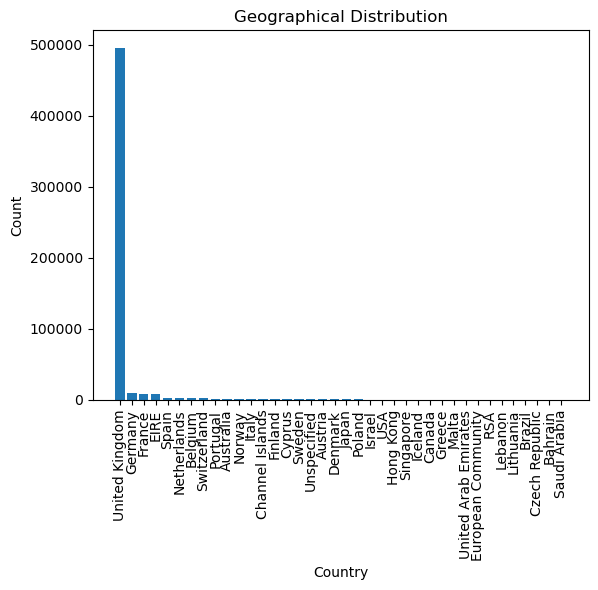

In [2]:
#Geographical distribution only: 
import pandas as pd

# Verify the file path
file_path = 'Online Retail.xlsx' 

try:
    #Confirm the file format
    data = pd.read_excel('Online Retail.xlsx')
    country_column = data['Country']


except Exception as e:
    #Check the error message and file integrity
    print("An error occurred while reading the file:")
    print(e)
    
    #Verify pandas and openpyxl versions
    print("Pandas version:", pd.__version__)
    print("Openpyxl version:", pd.__version__)


#Read the excel file
data = pd.read_excel('Online Retail.xlsx')
country_column = data['Country']

#Count the occurences of each country
country_counts = country_column.value_counts()

#Plot the bar chart
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Geographical Distribution')
plt.xticks(rotation=90)
plt.show()

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  

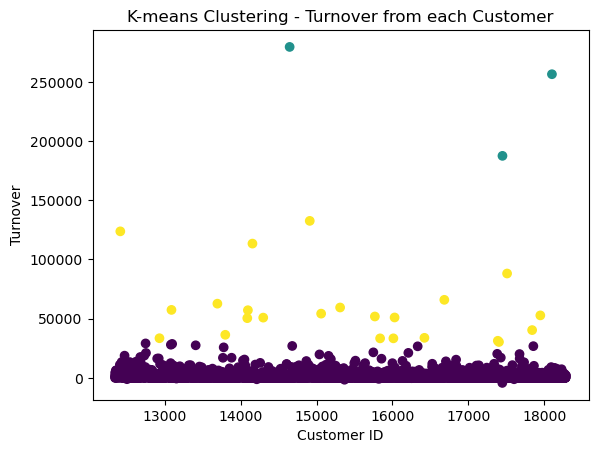

Silhouette Score for Turnover with 3 clusters: 0.999827020922339


In [3]:
#K-means implementation 1: 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the online retail dataset
df = pd.read_excel('Online Retail.xlsx')


#Data prep1: Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values) #there are 2 columns with the missing values: CustomerID 135080, and Description: 1454

#remove rows with missing values  
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])
print(df_cleaned.head())
print(df_cleaned.shape)

#Data prep2: Check for outliers
threshold = 0.95
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
outliers = df_cleaned[numeric_columns].quantile(threshold)
print("Outliers:", outliers)

#remove outliers
df_filtered = df_cleaned[(df_cleaned[numeric_columns] <= outliers).all(axis=1)]

# Extract necessary features for clustering
df['Turnover'] = df['Quantity'] * df['UnitPrice']
data = df[['CustomerID', 'Turnover']]

# Drop missing values
data = data.dropna()

# Group data by customer ID and calculate revenue per customer
turnover_per_customer = data.groupby('CustomerID')['Turnover'].sum().reset_index()

# Scale the features
scaler = StandardScaler()
turnover_per_customer_scaled = scaler.fit_transform(turnover_per_customer[['Turnover']])

# Apply K-means clustering; k=3 as 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(turnover_per_customer_scaled)

# Add the cluster labels to the dataset
turnover_per_customer['Cluster'] = kmeans.labels_

# Print the results
print(turnover_per_customer)

plt.scatter(turnover_per_customer['CustomerID'], turnover_per_customer['Turnover'], c=turnover_per_customer['Cluster'])
plt.xlabel('Customer ID')
plt.ylabel('Turnover')
plt.title('K-means Clustering - Turnover from each Customer')
plt.show() 


#Silhouette:
attribute_1 = df[['Turnover']].values.reshape(-1, 1)

#Perform k-means clustering with k = 3 ( meaning 3 clusters)
kmeans_turnover = KMeans(n_clusters=3, random_state=42)
turnover_labels = kmeans_turnover.fit_predict(attribute_1)
turnover_silhouette = silhouette_score(attribute_1, turnover_labels)

print("Silhouette Score for Turnover with 3 clusters:", turnover_silhouette)

Silhouette Score for Frequency & Turnover with 3 clusters: 0.9998270209216649


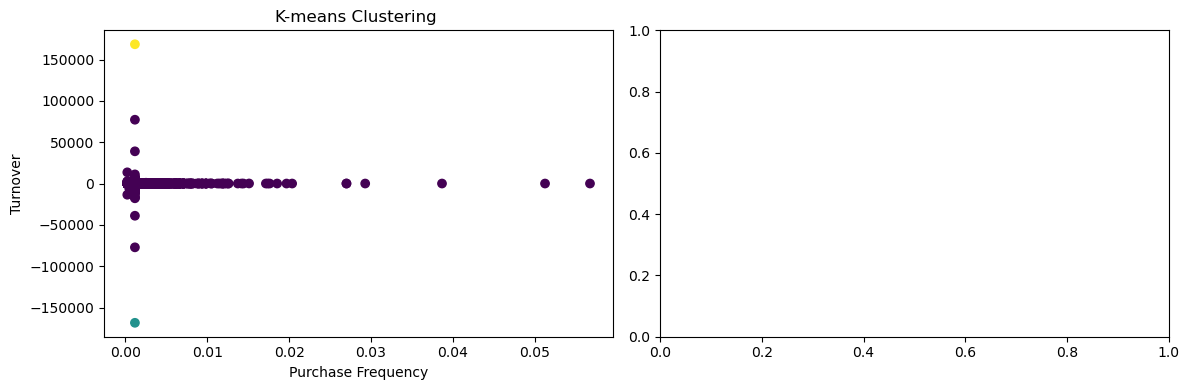

In [10]:
#K-means implementation 2: 
#import lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset into a DataFrame
df = pd.read_excel('Online Retail.xlsx')

#Data prep1: Check for missing values
missing_values = df.isnull().sum()
#print("Missing values:\n", missing_values) #there are 2 columns with the missing values: CustomerID 135080, and Description: 1454

#remove rows with missing values  
df_cleaned = df.dropna(subset=['CustomerID', 'Description'])
#print(df_cleaned.head())
#print(df_cleaned.shape)

#Data prep2: Check for outliers
threshold = 0.95
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
outliers = df_cleaned[numeric_columns].quantile(threshold)
#print("Outliers:", outliers)


#remove outliers
df_filtered = df_cleaned[(df_cleaned[numeric_columns] <= outliers).all(axis=1)]


#Data prep3: add columns
#Extract the date from the Date of Invoice column (Conversion first, otherwise, the invoice date will be treated as strings / objects)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Day'] = df['InvoiceDate'].dt.date 
df['Month'] = df['InvoiceDate'].dt.month

#Turnover calculation column
df['Turnover'] = df['Quantity'] * df['UnitPrice']
#print(df[['InvoiceDate', 'Month','Day']].head())
#print(df[['Turnover']].head())

#Purchase Frequency column
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique() / df['CustomerID'].nunique()
df['Purchase Frequency'] = purchase_frequency


#Data prep
attribute_2 = df[['Purchase Frequency', 'Turnover']]


#Handling missing value with mean imputation
imputer = SimpleImputer(strategy='mean')
attribute_2_imputed = imputer.fit_transform(attribute_2)
attribute_2_imputed = pd.DataFrame(attribute_2_imputed, columns=attribute_2.columns)
attribute_2_imputed.dropna(inplace=True)

#Transform scaled data and add to dataframe
scaled_attribute_2 = pd.DataFrame(imputer.fit_transform(attribute_2_imputed), columns=['Purchase Frequency', 'Turnover'])
scaled_values = imputer.fit_transform(attribute_2_imputed)
scaled_attribute_2 = pd.DataFrame(scaled_values, columns=['Purchase Frequency', 'Turnover'])


#Perform k-means clustering with k = 3 as 3 clusters
kmeans_freq = KMeans(n_clusters=3, random_state=42)
frequency_revenue_labels = kmeans_freq.fit_predict(scaled_attribute_2)

#Sihouette:
score_silhouette = silhouette_score(scaled_attribute_2, frequency_revenue_labels)
print("Silhouette Score for Frequency & Turnover with 3 clusters:", score_silhouette)

#visualisation of the 3 clusters: 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

#Scatter plot: 
ax1.scatter(scaled_attribute_2['Purchase Frequency'], scaled_attribute_2['Turnover'], c=frequency_revenue_labels)
ax1.set_xlabel('Purchase Frequency')
ax1.set_ylabel('Turnover')
ax1.set_title('K-means Clustering ')
plt.tight_layout()
plt.show()